<a href="https://colab.research.google.com/github/mukeshmane86/R-Programming-Project-on-Dibetes.csv-file/blob/main/R_Programming_Project_on_Dibetes_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# Load required libraries
library(tidyverse)
library(ggplot2)
library(dplyr)
library(reshape2)


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [14]:
diabetes <- read.csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", header = FALSE)
colnames(diabetes) <- c("Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome")

In [15]:
diabetes

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31.0,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1


In [16]:
# Print the summary statistics of the dataset
summary(diabetes)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

In [25]:
str(diabetes)

'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


In [17]:
# Check for missing values
sapply(diabetes, function(x) sum(is.na(x)))

Pregnancies                  Glucose            BloodPressure 
                       0                        0                        0 
           SkinThickness                  Insulin                      BMI 
                       0                        0                        0 
DiabetesPedigreeFunction                      Age                  Outcome 
                       0                        0                        0

# Data Visualization

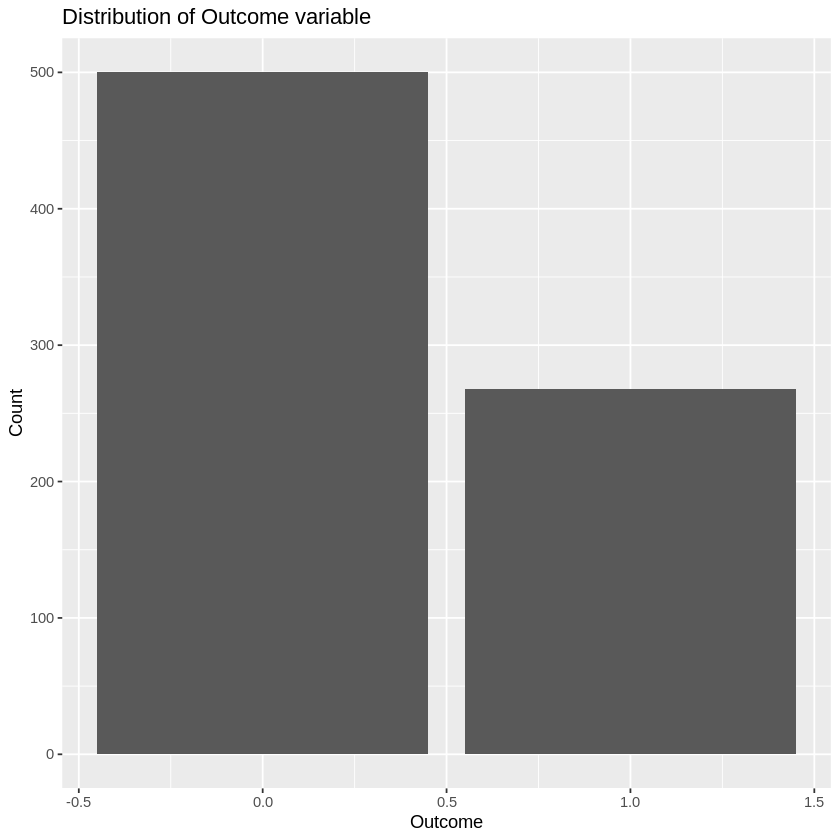

In [28]:
# Distribution of Outcome variable
ggplot(data = diabetes, aes(x = Outcome)) +
  geom_bar() +
  labs(x = "Outcome", y = "Count", title = "Distribution of Outcome variable")

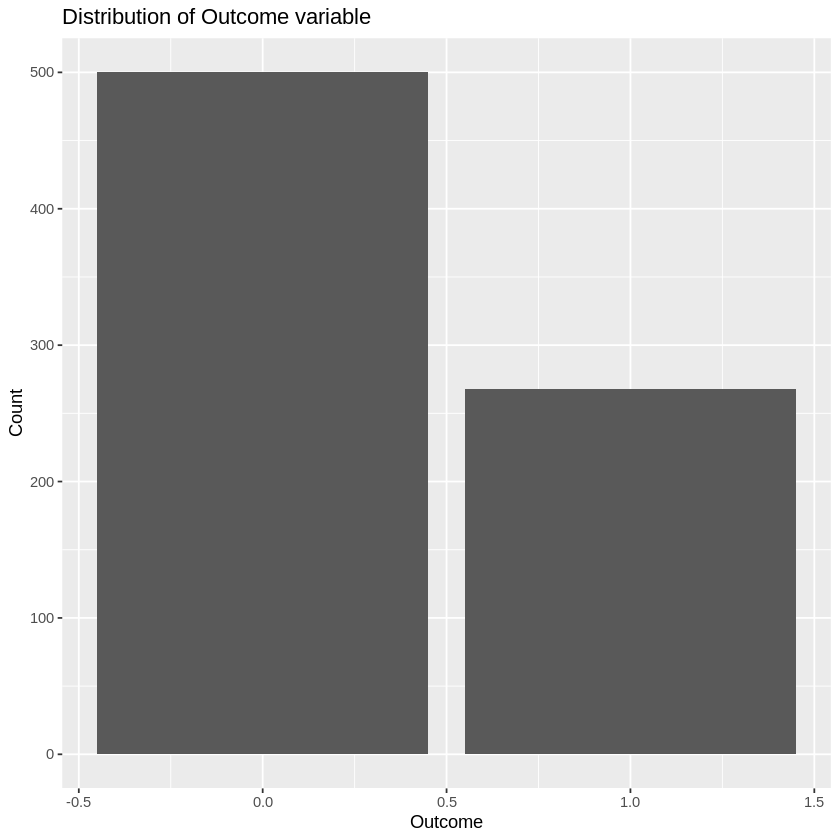

In [21]:
# Distribution of Outcome variable
ggplot(data = diabetes, aes(x = Outcome)) +
  geom_bar() +
  labs(x = "Outcome", y = "Count", title = "Distribution of Outcome variable")

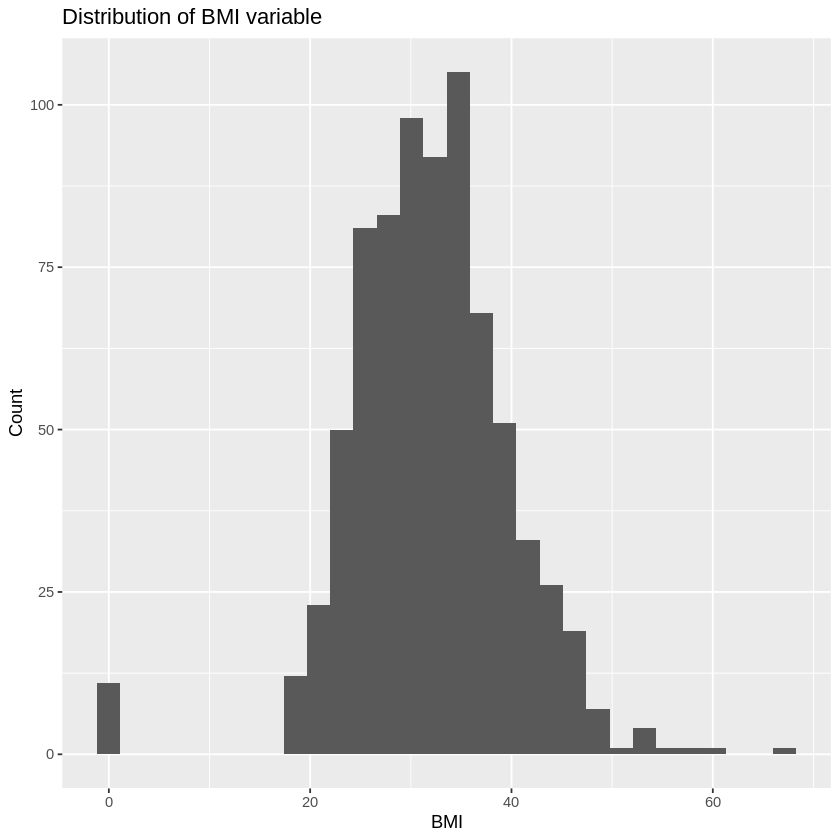

In [29]:
# Distribution of BMI variable
ggplot(data = diabetes, aes(x = BMI)) +
  geom_histogram(bins = 30) +
  labs(x = "BMI", y = "Count", title = "Distribution of BMI variable")

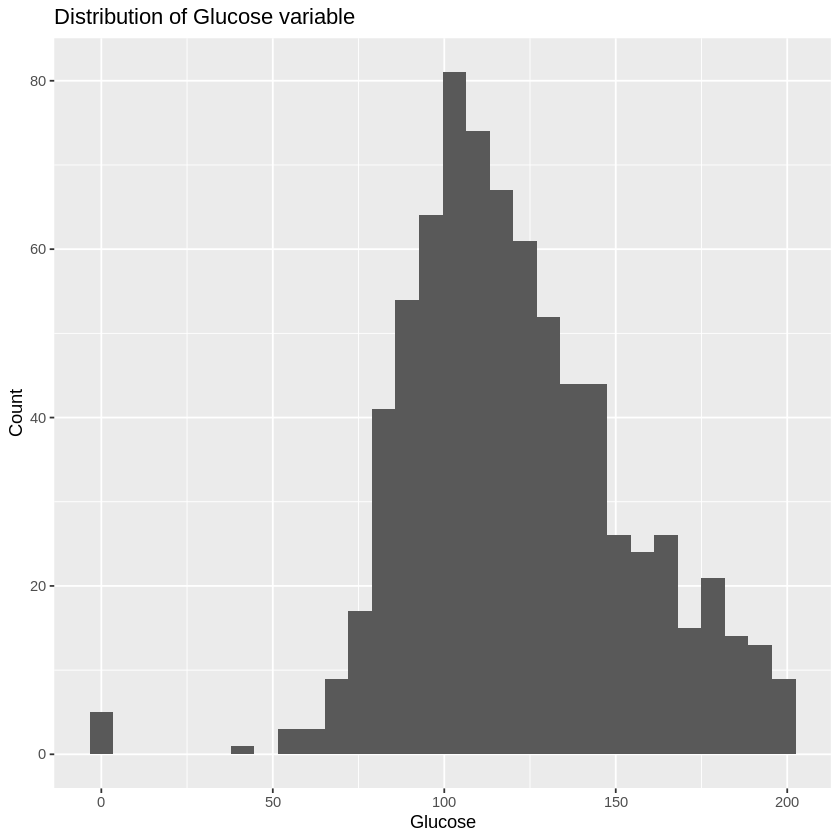

In [30]:
# Distribution of Glucose variable
ggplot(data = diabetes, aes(x = Glucose)) +
  geom_histogram(bins = 30) +
  labs(x = "Glucose", y = "Count", title = "Distribution of Glucose variable")

Warning message:
“Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?”


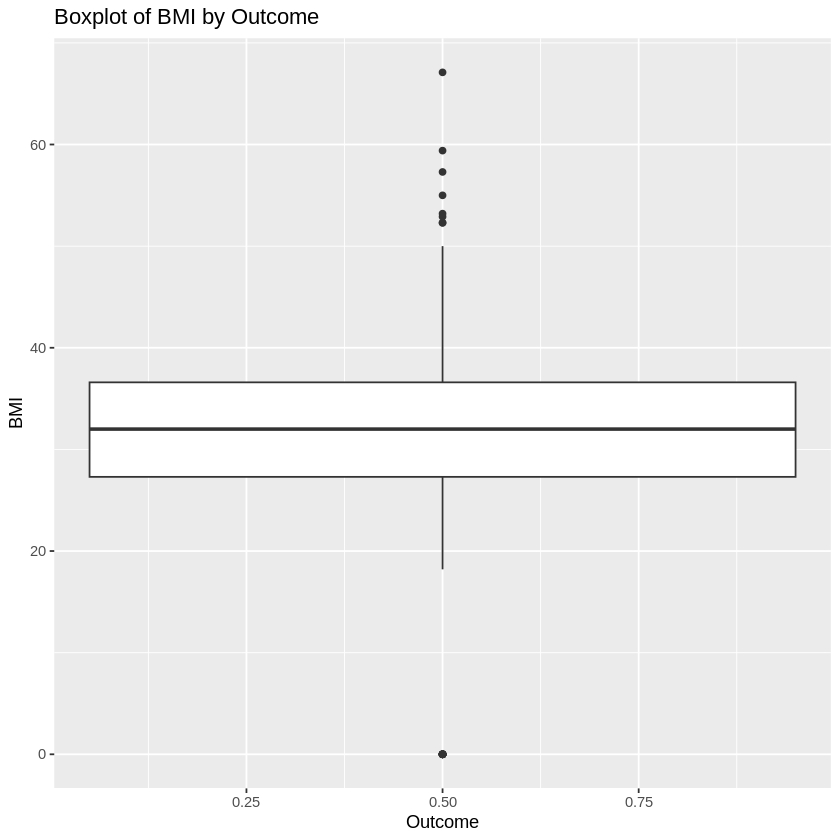

In [35]:
# Boxplot of BMI by Outcome
ggplot(data = diabetes, aes(x = Outcome, y = BMI)) +
  geom_boxplot() +
  labs(x = "Outcome", y = "BMI", title = "Boxplot of BMI by Outcome")

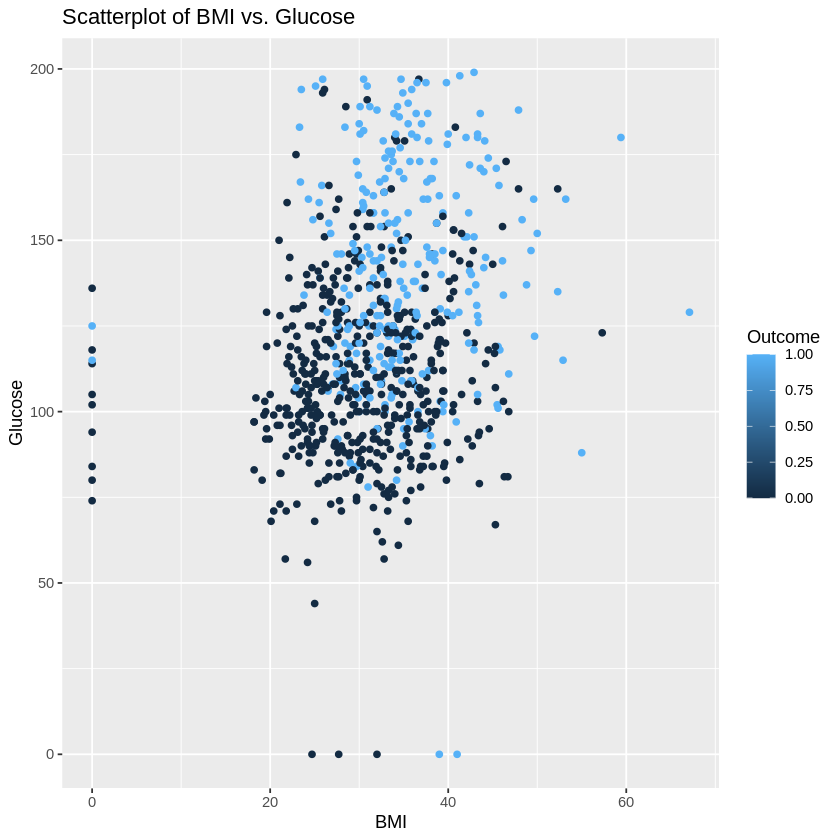

In [32]:
# Scatterplot of BMI vs. Glucose
ggplot(data = diabetes, aes(x = BMI, y = Glucose, color = Outcome)) +
  geom_point() +
  labs(x = "BMI", y = "Glucose", title = "Scatterplot of BMI vs. Glucose")

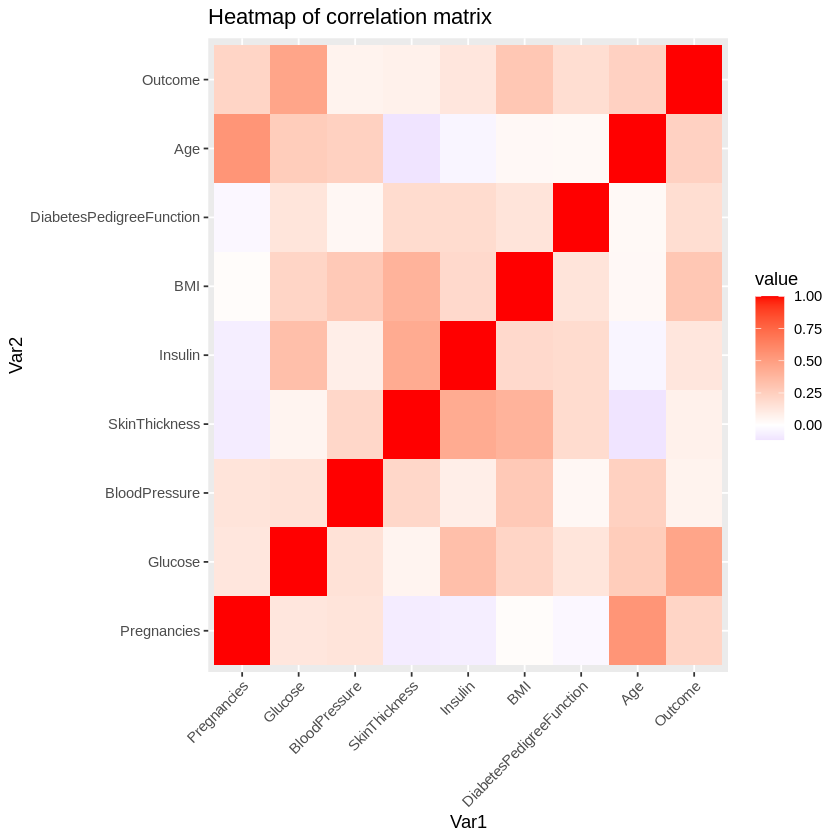

In [42]:
# Heatmap of correlation matrix
ggplot(data = melt(cor(diabetes)), aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0) +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  ggtitle("Heatmap of correlation matrix")

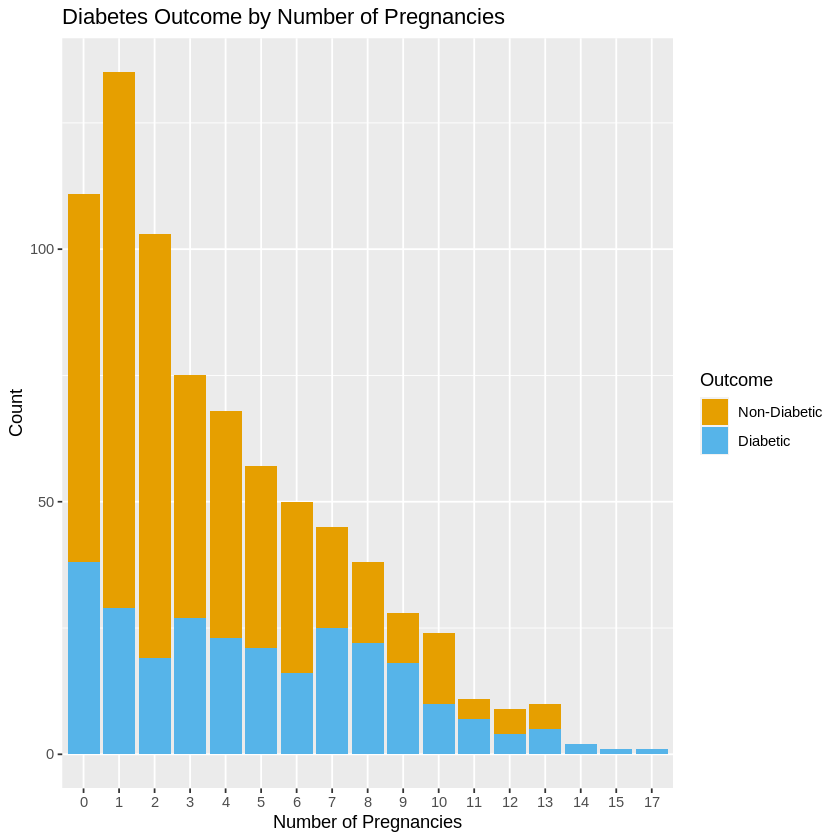

In [46]:
# 5. Stacked bar chart of diabetes outcome by number of pregnancies
print(ggplot(diabetes, aes(x = factor(Pregnancies), fill = factor(Outcome))) +
  geom_bar(position = "stack") +
  labs(title = "Diabetes Outcome by Number of Pregnancies",
       x = "Number of Pregnancies", y = "Count") +
  scale_fill_manual(values = c("#E69F00", "#56B4E9"), name = "Outcome",
                    labels = c("Non-Diabetic", "Diabetic")))

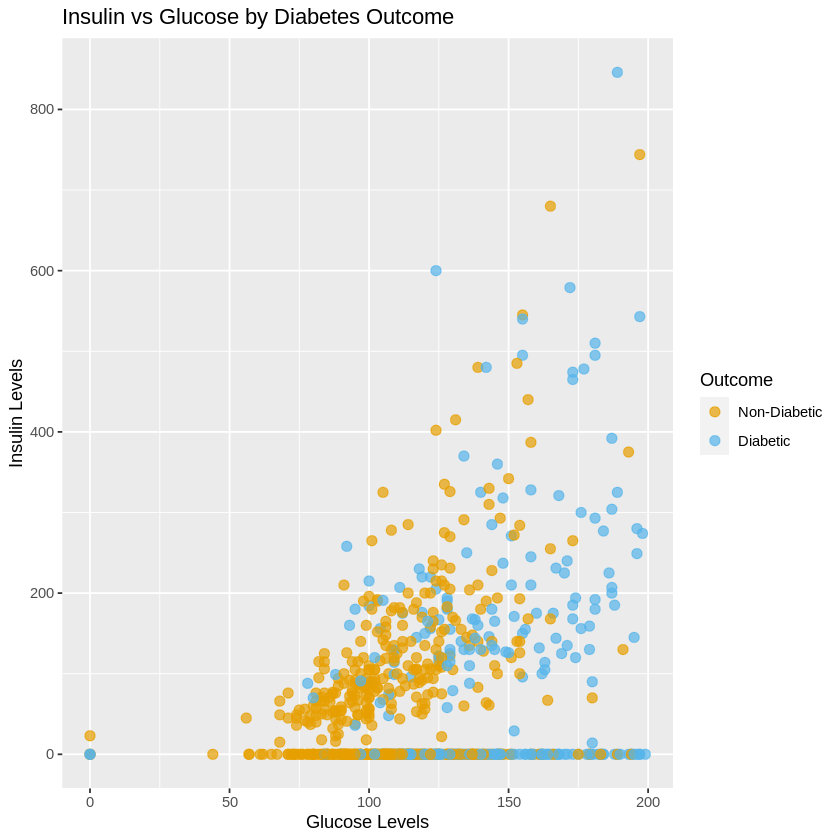

In [48]:
#  Scatter plot of insulin and glucose levels
print(ggplot(diabetes, aes(x = Glucose, y = Insulin, color = factor(Outcome))) +
  geom_point(alpha = 0.7, size = 2.5) +
  labs(title = "Insulin vs Glucose by Diabetes Outcome",
       x = "Glucose Levels", y = "Insulin Levels") +
  scale_color_manual(values = c("#E69F00", "#56B4E9"), name = "Outcome",
                     labels = c("Non-Diabetic", "Diabetic")))